# Logistic Regression

Import packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_path = 'data/x.txt'
y_path = 'data/y.txt'

df_x = pd.read_csv(x_path, header=None, names=["x1","x2"], sep='\s\s+', engine='python')
df_y = pd.read_csv(y_path, header=None, names=["y"], sep='\s\s+', engine='python')

df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [3]:
df_x.head(5)

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


Add column of 1 to x for intercept

In [4]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
y = df_y["y"].values

In [5]:
print(x)

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]
 [ 1.          1.9458584  -2.0443278 ]
 [ 1.          2.1075153  -2.1256684 ]
 [ 1.          2.070373   -2.4634101 ]
 [ 1.          0.86864964 -2.4119348 ]
 [ 1.          1.8006594  -2.7739689 ]
 [ 1.          3.1283787  -3.4452432 ]
 [ 1.          3.0947429  -3.6446145 ]
 [ 1.          2.9086652  -4.0065037 ]
 [ 1.          2.6770338  -3.0198592 ]
 [ 1.          2.7458671  -2.7100561 ]
 [ 1.          4.1714647  -3.4622482 ]
 [ 1.          3.931322   -2.1099044 ]
 [ 1.          4.378687   -2.3804743 ]
 [ 1.          4.8016565  -3.3803344 ]
 [ 1.          4.166105   -2.8138844 ]
 [ 1.          2.4670141  -1.6108444 ]
 [ 1.          3.4826743  -1.5533872 ]
 [ 1.          3.3652482  -1.8164936 ]
 [ 1.          2.8772788  -1.8511689 ]
 [ 1.          3.1090444  -1.6384946 ]
 [ 1.          2.2183701 

We define the loss function of a logistic regression as

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \log(1+e^{-y^i \theta^T x^i}) = -\frac{1}{m} \sum_{i=1}^m \log(h_{\theta}(y^i x^i))
$$


Therefore, we find that the gradient of the loss function is

$$
\frac{\partial}{\partial \theta_j} J(\theta)=-\frac{1}{m}.\sum_{i=1}^m (1-h_{\theta}(y^i x^i)).y^i.x_j^i
$$

We define the sigmoid and gradient of the loss functions as the following

In [6]:
def logistic(x):
    return 1/(1+np.exp(-x))

def grad_loss(theta, x, y):
    z = y*x.dot(theta)
    return -np.mean((1-logistic(z))*y*x.T, axis=1)

The Hessian can also be defined as:

$$
\begin{align*}
H_{j,k}
&= \frac{1}{m}.\sum_{i=1}^m h_{\theta}(y^i x^i).(1-h_{\theta}(y^i x^i)).x_j^i.x_k^i
\end{align*}
$$



In [7]:

def hess_loss(theta, x, y):
    hess = np.zeros((x.shape[1], x.shape[1]))
    z = y*x.dot(theta)
    for i in range(hess.shape[0]):
        for j in range(hess.shape[0]):
            if i <= j:
                hess[i][j] = np.mean(logistic(z)*(1-logistic(z))*x[:,i]*x[:,j])
                if i != j:
                    hess[j][i] = hess[i][j] 
    return hess

The Newton-Rhapson method can be defined as:

$$
\begin{align*}
    \theta := \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}
$$

Therefore, we define our NR function as

In [8]:
def newton(theta0, x, y, G, H, eps):
    count = 0
    theta = theta0
    delta = 1
    while delta > eps:
        theta_prev = theta.copy()
        theta -= np.linalg.inv(H(theta, x, y)).dot(G(theta, x, y))
        delta = np.linalg.norm(theta-theta_prev, ord=1)
        count += 1
#         if (count%1 == 0):
        print('Count: %i Loss: %.5f'% (count, delta))
    return theta

Start training

In [9]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Newton's method
theta_final = newton(theta0,x,y,grad_loss,hess_loss,1e-6)

Count: 1 Loss: 2.56655
Count: 2 Loss: 1.25497
Count: 3 Loss: 0.60910
Count: 4 Loss: 0.11839
Count: 5 Loss: 0.00381
Count: 6 Loss: 0.00000
Count: 7 Loss: 0.00000


In [10]:
theta_final

array([-2.6205116 ,  0.76037154,  1.17194674])

In [11]:
df_x.insert(0, "y", df_y)
df_x["y"] = pd.to_numeric(df_x["y"],downcast='signed')
df_x.head()

,y,x1,x2
0,-1,1.343250,-1.331148
1,-1,1.820553,-0.634668
2,-1,0.986321,-1.888576
3,-1,1.944373,-1.635452
4,-1,0.976734,-1.353315


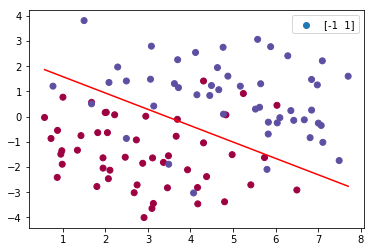

In [33]:

# Generate variables to draw boundary decision
x1_vec = np.linspace(df_x["x1"].min(),df_x["x1"].max(),2)

# Plot raw data
# sns.scatterplot(x="x1", y="x2", hue="y", data=df_x);
plt.scatter(df_x['x1'], df_x['x2'], c=df_x['y'], label = df_x['y'].unique(), cmap='Spectral')
plt.legend()
# Plot decision boundary

plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");